In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_files(name):
    article_path = "../data/cnn_daily_mail/%s/article" % name
    highlights_path = "../data/cnn_daily_mail/%s/highlights" % name
    
    articles = [x.rstrip() for x in open(article_path).readlines()]
    highlights = [x.rstrip() for x in open(highlights_path).readlines()]
    
    assert len(articles) == len(highlights)
    return articles, highlights

In [3]:
train_articles, train_highlights = read_files("train")
test_articles, test_highlights = read_files("test")
val_articles, val_highlights = read_files("val")

In [4]:
def count_words_ds(ds):
    word_count = np.zeros(len(ds))
    for i, sent in enumerate(ds):
        word_count[i] = len(sent.split(" "))
    return word_count     
    

def count_words(articles, highlights):
    word_a = count_words_ds(articles)
    word_h = count_words_ds(highlights)
    
    return word_a, word_h

In [14]:
from transformers import T5Tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-base")
def count_tokens(articles, highlights):
    
    word_a = np.zeros(len(articles))
    for i, item in enumerate(articles):
        word_a[i] = len(tokenizer(item).input_ids)
    
    word_h = np.zeros(len(articles))
    for i, item in enumerate(highlights):
        word_h[i] = len(tokenizer(item).input_ids)
    
    return word_a, word_h

count_tokens(["This is a test sentence."], ["This is a secound test sentence."])

(array([8.]), array([11.]))

In [6]:
train_a_count, train_h_count = count_words(train_articles, train_highlights)
val_a_count, val_h_count = count_words(val_articles, val_highlights)
test_a_count, test_h_count = count_words(test_articles, test_highlights)

In [7]:
a_count = np.concatenate([train_a_count, val_a_count, test_a_count])
h_count = np.concatenate([train_h_count, val_h_count, test_h_count])

--- Word Count ---


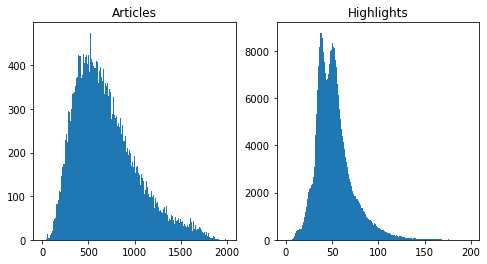

Articles mean: 690.89	median: 630	std: 337.37	min/max: [8/2347]
Highlights mean: 51.89	median: 49	std: 21.50	min/max: [4/1441]


In [8]:
def plot_show(name, count_a, count_h):
    print("--- %s ---" % name)
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    
    axs[0].hist(count_a, range(0,2000))
    axs[0].set_title("Articles")
    axs[1].hist(count_h, range(0,200))
    axs[1].set_title("Highlights")
    plt.show()
    print("Articles mean: {:.2f}\tmedian: {:.0f}\tstd: {:.2f}\tmin/max: [{:.0f}/{:.0f}]".format(np.mean(count_a), np.median(count_a),\
                                                   np.std(count_a), np.min(count_a), np.max(count_a)))
    print("Highlights mean: {:.2f}\tmedian: {:.0f}\tstd: {:.2f}\tmin/max: [{:.0f}/{:.0f}]".format(np.mean(count_h), np.median(count_h),\
                                                   np.std(count_h), np.min(count_h), np.max(count_h)))
 
plot_show("Word Count", a_count, h_count)

In [15]:
train_a_count, train_h_count = count_tokens(train_articles, train_highlights)
val_a_count, val_h_count = count_tokens(val_articles, val_highlights)
test_a_count, test_h_count = count_tokens(test_articles, test_highlights)

Token indices sequence length is longer than the specified maximum sequence length for this model (546 > 512). Running this sequence through the model will result in indexing errors


In [16]:
train_a_count, train_h_count

(array([ 291.,  546., 1179., ..., 1335., 1168., 1308.]),
 array([ 50.,  59., 107., ...,  79.,  80.,  76.]))

In [17]:
a_count = np.concatenate([train_a_count, val_a_count, test_a_count])
h_count = np.concatenate([train_h_count, val_h_count, test_h_count])

--- Token Count ---


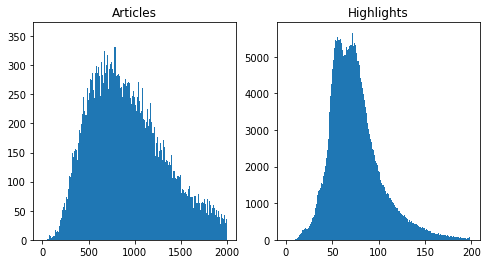

Articles mean: 981.39	median: 893	std: 481.61	min/max: [18/5267]
Highlights mean: 75.22	median: 71	std: 31.15	min/max: [7/3151]


In [18]:
plot_show("Token Count", a_count, h_count)

In [ ]:
from spacy.lang.en import English 

nlp = English()
nlp.add_pipe('sentencizer')


def split_in_sentences(text):
    doc = nlp(text)
    return [str(sent).strip() for sent in doc.sents]

In [19]:
split_in_sentences("This is a test. What is that?")

['This is a test.', 'What is that?']

In [28]:
def count_sent_ds(ds):
    word_count = np.zeros(len(ds))
    
    for i, line in enumerate(ds):

        word_count[i] = len(split_in_sentences(line))
    return word_count     
    

def count_sent(articles, highlights):
    word_a = count_sent_ds(articles)
    word_h = count_sent_ds(highlights)
    
    return word_a, word_h

def plot_show(name, count_a, count_h):
    print("--- %s ---" % name)
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    
    axs[0].hist(count_a, range(0,150))
    axs[0].set_title("Articles")
    axs[1].hist(count_h, range(0,15))
    axs[1].set_title("Highlights")
    plt.show()
    print("Articles mean: {:.2f}\tmedian: {:.0f}\tstd: {:.2f}\tmin/max: [{:.0f}/{:.0f}]".format(np.mean(count_a), np.median(count_a),\
                                                   np.std(count_a), np.min(count_a), np.max(count_a)))
    print("Highlights mean: {:.2f}\tmedian: {:.0f}\tstd: {:.2f}\tmin/max: [{:.0f}/{:.0f}]".format(np.mean(count_h), np.median(count_h),\
                                                   np.std(count_h), np.min(count_h), np.max(count_h)))

--- Sentence Count ---


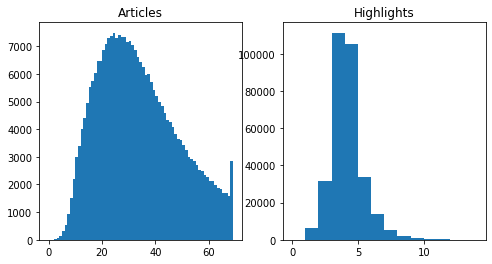

Articles mean: 39.05	median: 33	variance: 555.49	min/max: [1/400]
Highlights mean: 3.69	median: 4	variance: 1.85	min/max: [1/108]


In [21]:
train_a_count, train_h_count = count_sent(train_articles, train_highlights)
val_a_count, val_h_count = count_sent(val_articles, val_highlights)
test_a_count, test_h_count = count_sent(test_articles, test_highlights)

a_count = np.concatenate([train_a_count, val_a_count, test_a_count])
h_count = np.concatenate([train_h_count, val_h_count, test_h_count])


--- Sentence Count ---


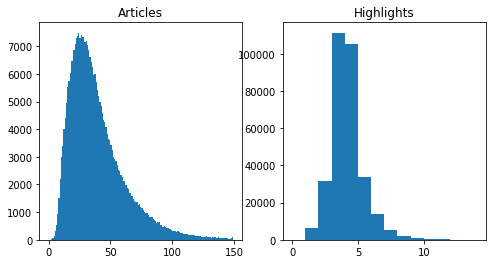

Articles mean: 39.05	median: 33	std: 23.57	min/max: [1/400]
Highlights mean: 3.69	median: 4	std: 1.36	min/max: [1/108]


In [29]:
plot_show("Sentence Count", a_count, h_count)
